# Exploratory Data Analysis (EDA) for SROIE Receipts

This notebook performs EDA for the **SROIE 2019 receipt dataset** used in the project:
- Explore **raw images** (`data/raw/SROIE2019/train/img`, `.../test/img`)
- Explore **preprocessed images** (`data/processed/SROIE2019/train`, `.../test`)
- Compare **before vs after** preprocessing
- Summarize basic statistics (image counts, sizes, aspect ratios)
- Provide visual evidence to justify the preprocessing pipeline

In [14]:
import os
from pathlib import Path
from collections import Counter

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

RAW_ROOT = Path("../data/raw/SROIE2019")
PROC_ROOT = Path("../data/processed/SROIE2019")

RAW_TRAIN_IMG = RAW_ROOT / "train" / "img"
RAW_TEST_IMG  = RAW_ROOT / "test" / "img"

PROC_TRAIN_IMG = PROC_ROOT / "train"
PROC_TEST_IMG  = PROC_ROOT / "test"

print("Raw train dir :", RAW_TRAIN_IMG)
print("Raw test dir  :", RAW_TEST_IMG)
print("Proc train dir:", PROC_TRAIN_IMG)
print("Proc test dir :", PROC_TEST_IMG)

for p in [RAW_TRAIN_IMG, RAW_TEST_IMG, PROC_TRAIN_IMG, PROC_TEST_IMG]:
    print(p, "exists:", p.exists())

Raw train dir : ../data/raw/SROIE2019/train/img
Raw test dir  : ../data/raw/SROIE2019/test/img
Proc train dir: ../data/processed/SROIE2019/train
Proc test dir : ../data/processed/SROIE2019/test
../data/raw/SROIE2019/train/img exists: True
../data/raw/SROIE2019/test/img exists: True
../data/processed/SROIE2019/train exists: True
../data/processed/SROIE2019/test exists: True


## 1. Image Counts in Raw vs Processed Sets

In [15]:
def count_images(folder: Path, exts={".jpg", ".jpeg", ".png", ".tif", ".tiff"}):
    if not folder.exists():
        return 0
    return sum(1 for f in folder.iterdir() if f.suffix.lower() in exts)

summary = {
    "raw_train": count_images(RAW_TRAIN_IMG),
    "raw_test": count_images(RAW_TEST_IMG),
    "proc_train": count_images(PROC_TRAIN_IMG),
    "proc_test": count_images(PROC_TEST_IMG)
}

summary

{'raw_train': 626, 'raw_test': 347, 'proc_train': 626, 'proc_test': 347}

## 2. Peek at Sample Filenames

In [16]:
def sample_files(folder: Path, n=5):
    if not folder.exists():
        return []
    files = [f for f in folder.iterdir() if f.is_file()]
    return files[:n]

print("Raw train samples:")
for f in sample_files(RAW_TRAIN_IMG):
    print("  ", f.name)

print("\nProcessed train samples:")
for f in sample_files(PROC_TRAIN_IMG):
    print("  ", f.name)

Raw train samples:
   X51005442376.jpg
   X51009453804.jpg
   X51006401723.jpg
   X51006913023.jpg
   X51007846451.jpg

Processed train samples:
   X51005442376.jpg
   X51009453804.jpg
   X51006401723.jpg
   X51006913023.jpg
   X51007846451.jpg


## 3. Image Size & Aspect Ratio Distribution

In [17]:
def collect_image_stats(folder: Path, max_images=500):
    widths, heights, aspects = [], [], []
    if not folder.exists():
        return widths, heights, aspects
    files = [f for f in folder.iterdir() if f.is_file()]
    for f in files[:max_images]:
        try:
            with Image.open(f) as img:
                w, h = img.size
            widths.append(w)
            heights.append(h)
            aspects.append(w/h if h != 0 else np.nan)
        except Exception as e:
            print("Failed to open", f, ":", e)
    return widths, heights, aspects

raw_w, raw_h, raw_a = collect_image_stats(RAW_TRAIN_IMG)
proc_w, proc_h, proc_a = collect_image_stats(PROC_TRAIN_IMG)

print("Raw train images analyzed:", len(raw_w))
print("Processed train images analyzed:", len(proc_w))

Raw train images analyzed: 500
Processed train images analyzed: 500


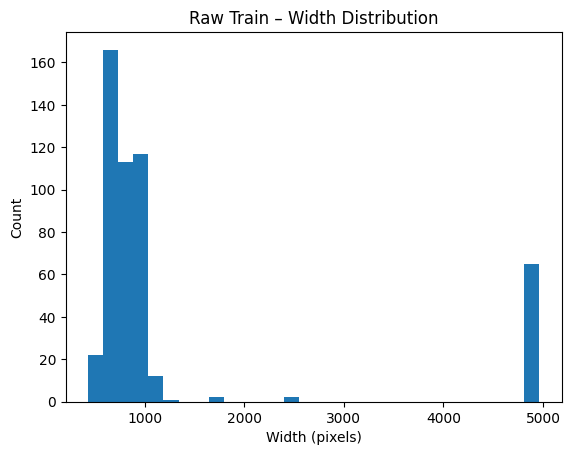

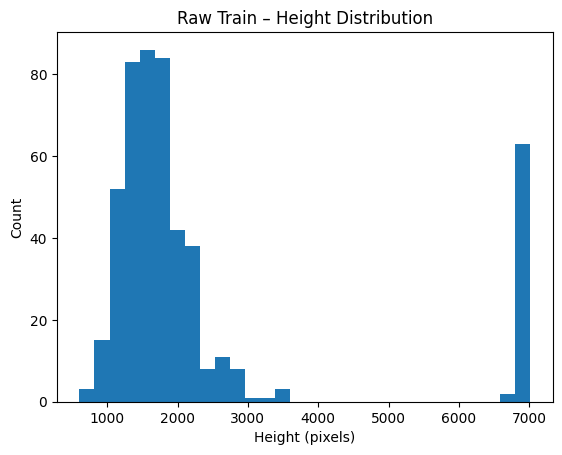

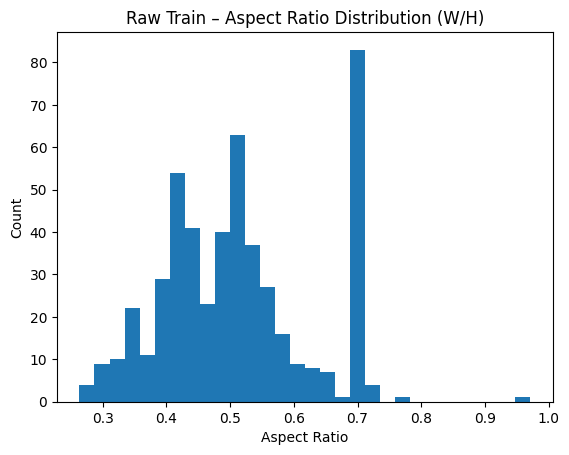

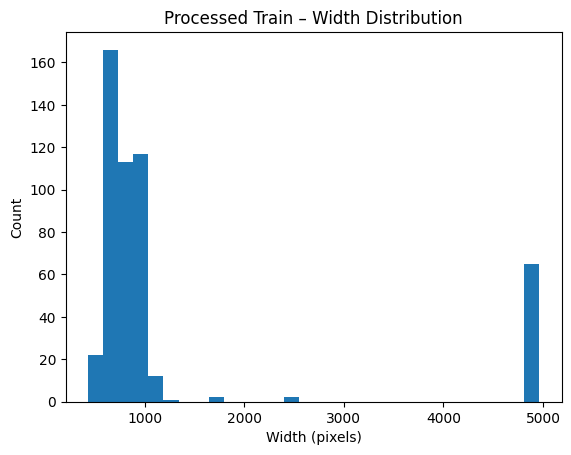

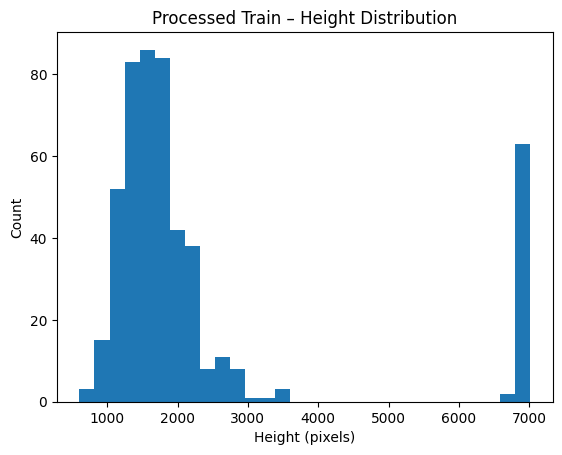

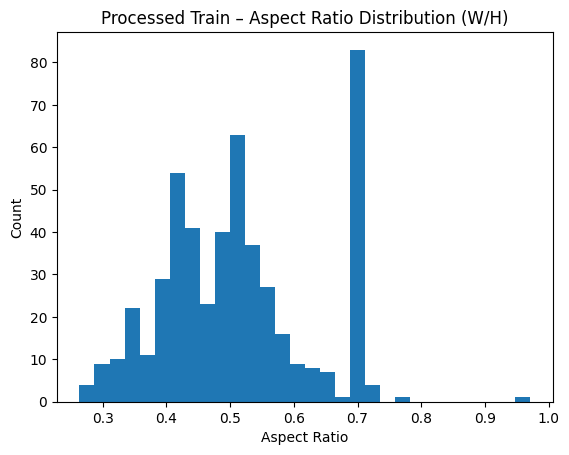

In [18]:
def plot_hist(data, title, xlabel):
    if not data:
        print("No data for", title)
        return
    plt.figure()
    plt.hist(data, bins=30)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.show()

plot_hist(raw_w, "Raw Train – Width Distribution", "Width (pixels)")
plot_hist(raw_h, "Raw Train – Height Distribution", "Height (pixels)")
plot_hist(raw_a, "Raw Train – Aspect Ratio Distribution (W/H)", "Aspect Ratio")

plot_hist(proc_w, "Processed Train – Width Distribution", "Width (pixels)")
plot_hist(proc_h, "Processed Train – Height Distribution", "Height (pixels)")
plot_hist(proc_a, "Processed Train – Aspect Ratio Distribution (W/H)", "Aspect Ratio")

## 4. Visual Comparison: Raw vs Processed Receipts

Comparing: X51007339126


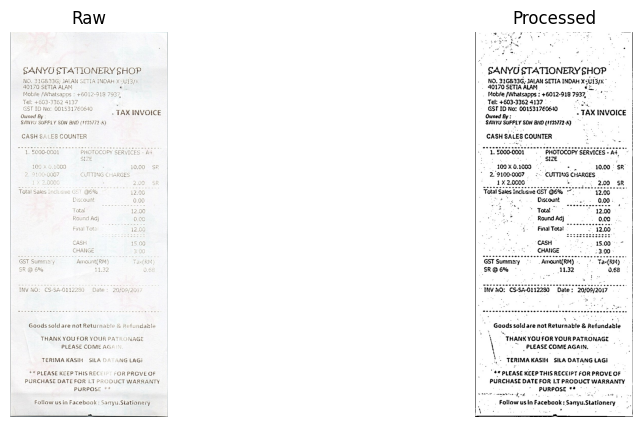

Comparing: X51006414636


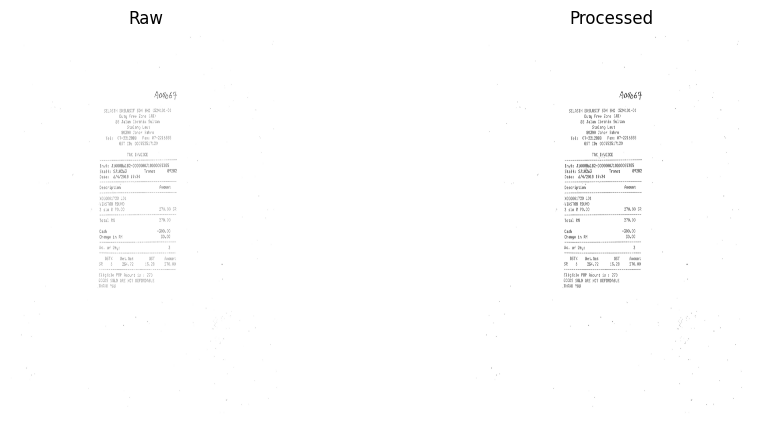

Comparing: X51008042793


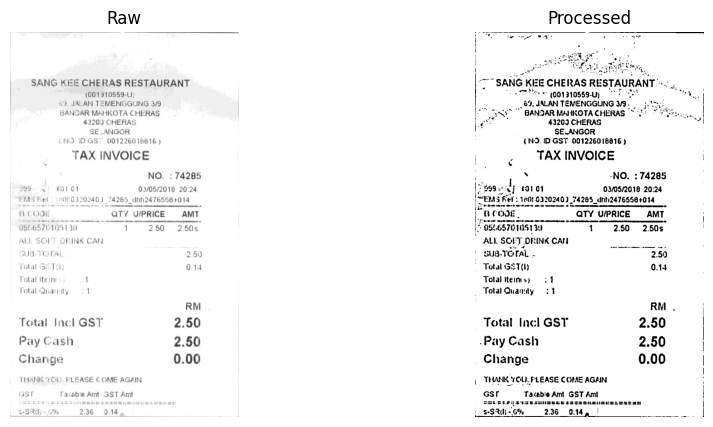

In [19]:
import random

def show_raw_vs_processed(raw_dir: Path, proc_dir: Path, n=3):
    if not raw_dir.exists() or not proc_dir.exists():
        print("Directory missing.")
        return

    raw_files = [f for f in raw_dir.iterdir() if f.is_file()]
    proc_files = [f for f in proc_dir.iterdir() if f.is_file()]

    raw_by_stem = {f.stem: f for f in raw_files}
    proc_by_stem = {f.stem: f for f in proc_files}

    common = list(set(raw_by_stem.keys()) & set(proc_by_stem.keys()))
    if not common:
        print("No matching filenames.")
        return

    random.shuffle(common)
    samples = common[:n]

    for stem in samples:
        raw_path = raw_by_stem[stem]
        proc_path = proc_by_stem[stem]

        print(f"Comparing: {stem}")
        fig, axes = plt.subplots(1, 2, figsize=(11, 5))

        with Image.open(raw_path) as r:
            axes[0].imshow(r)
            axes[0].set_title("Raw")
            axes[0].axis("off")

        with Image.open(proc_path) as p:
            axes[1].imshow(p, cmap="gray")
            axes[1].set_title("Processed")
            axes[1].axis("off")

        plt.show()

show_raw_vs_processed(RAW_TRAIN_IMG, PROC_TRAIN_IMG)

## 5. Observations for Report

**Use these prompts when writing your EDA section:**

- Raw images vary significantly in resolution and aspect ratio.
- Common issues include: shadows, skewed scans, low contrast, noise, background artifacts.
- Preprocessing improves contrast, removes background, and stabilizes text regions.
- Deskewing provides more horizontally aligned text → improves OCR accuracy.
- Thresholding removes noise and highlights text contours.
- Processed images are more uniform, improving OCR consistency.

These bullet points will become 1–2 paragraphs in your final technical report.